In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline


In [2]:
data=pd.read_csv(r"C:\Users\USER\OneDrive\Documents\customer segmentation\marketing_campaign.csv")

In [3]:
data.head()
print('number of datapoints:',len(data))

number of datapoints: 2240


In [4]:
data.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Unnamed: 29
0,5524,1957,Graduation,Single,58138,0,0,4/9/2012,58,635,...,0,0,0,0,0,0,3,11,1.0,NaN
1,2174,1954,Graduation,Single,46344,1,1,8/3/2014,38,11,...,0,0,0,0,0,0,3,11,0.0,NaN
2,4141,1965,Graduation,Together,71613,0,0,21/08/2013,26,426,...,0,0,0,0,0,0,3,11,0.0,NaN


In [5]:
data.duplicated().any()

False

In [6]:
data.duplicated().sum()

0

In [7]:
data.shape

(2240, 30)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   object 
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   object 
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   object 
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
data.drop(['Unnamed: 29'],axis=1,inplace=True)

In [10]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [11]:
data.isna().any().sum()

1

In [12]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                  0
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response               21
dtype: int64

In [13]:
data.dropna(inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2219 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2219 non-null   int64  
 1   Year_Birth           2219 non-null   int64  
 2   Education            2219 non-null   object 
 3   Marital_Status       2219 non-null   object 
 4   Income               2219 non-null   object 
 5   Kidhome              2219 non-null   int64  
 6   Teenhome             2219 non-null   object 
 7   Dt_Customer          2219 non-null   object 
 8   Recency              2219 non-null   object 
 9   MntWines             2219 non-null   int64  
 10  MntFruits            2219 non-null   int64  
 11  MntMeatProducts      2219 non-null   int64  
 12  MntFishProducts      2219 non-null   int64  
 13  MntSweetProducts     2219 non-null   int64  
 14  MntGoldProds         2219 non-null   int64  
 15  NumDealsPurchases    2219 non-null   int64 

In [15]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"],format='%d/%m/%Y',errors='coerce').dt.date





In [16]:
data.head(19)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1.0
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0.0
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0.0
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0.0
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0.0
5,7446,1967,Master,Together,62513,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0.0
6,965,1971,Graduation,Divorced,55635,0,1,2012-11-13,34,235,...,6,0,0,0,0,0,0,3,11,0.0
7,6177,1985,PhD,Married,33454,1,0,2013-05-08,32,76,...,8,0,0,0,0,0,0,3,11,0.0
8,4855,1974,PhD,Together,30351,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1.0
9,5899,1950,PhD,Together,5648,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0.0


In [17]:
data['Dt_Customer'].isna().sum()

119

In [18]:
data.isna().sum()

ID                       0
Year_Birth               0
Education                0
Marital_Status           0
Income                   0
Kidhome                  0
Teenhome                 0
Dt_Customer            119
Recency                  0
MntWines                 0
MntFruits                0
MntMeatProducts          0
MntFishProducts          0
MntSweetProducts         0
MntGoldProds             0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth        0
AcceptedCmp3             0
AcceptedCmp4             0
AcceptedCmp5             0
AcceptedCmp1             0
AcceptedCmp2             0
Complain                 0
Z_CostContact            0
Z_Revenue                0
Response                 0
dtype: int64

In [19]:
data.dropna(inplace=True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2100 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2100 non-null   int64  
 1   Year_Birth           2100 non-null   int64  
 2   Education            2100 non-null   object 
 3   Marital_Status       2100 non-null   object 
 4   Income               2100 non-null   object 
 5   Kidhome              2100 non-null   int64  
 6   Teenhome             2100 non-null   object 
 7   Dt_Customer          2100 non-null   object 
 8   Recency              2100 non-null   object 
 9   MntWines             2100 non-null   int64  
 10  MntFruits            2100 non-null   int64  
 11  MntMeatProducts      2100 non-null   int64  
 12  MntFishProducts      2100 non-null   int64  
 13  MntSweetProducts     2100 non-null   int64  
 14  MntGoldProds         2100 non-null   int64  
 15  NumDealsPurchases    2100 non-null   int64 

In [21]:
data['Education'].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n              84
Basic           54
Name: count, dtype: int64

In [22]:
data['Marital_Status'].value_counts()

Marital_Status
Married     777
Together    517
Single      435
Divorced    209
Cycle        84
Widow        71
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [23]:
data['Teenhome']=data['Teenhome'].astype('int64')

In [24]:
# create new columns age, money spent,famly size 

# customer age
data['Age']=2024-data['Year_Birth']


# total spending on items

data['Spent']=data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+ data['MntGoldProds']+data['MntWines']

#Deriving living situation by marital status"Alone"
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

# regrouping education columns

data['Education']=data['Education'].replace({'Basic':'Undergraduate','Master':'Post_graduate','Graduation':'Graduate','PHD':'Post_graduate','2n':'Undergraduate'})

data=data.rename(columns={'MntWines':'Wines', 'MntFruits':'Fruits','MntMeatProducts':'MeatProducts', 'MntFishProducts':'FishProducts', 'MntSweetProducts':'SweatProducts','MntGoldProds':'GoldProducts'})

In [25]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'MeatProducts',
       'FishProducts', 'SweatProducts', 'GoldProducts', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'Age', 'Spent', 'Living_With', 'Children'],
      dtype='object')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2100 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2100 non-null   int64  
 1   Year_Birth           2100 non-null   int64  
 2   Education            2100 non-null   object 
 3   Marital_Status       2100 non-null   object 
 4   Income               2100 non-null   object 
 5   Kidhome              2100 non-null   int64  
 6   Teenhome             2100 non-null   int64  
 7   Dt_Customer          2100 non-null   object 
 8   Recency              2100 non-null   object 
 9   Wines                2100 non-null   int64  
 10  Fruits               2100 non-null   int64  
 11  MeatProducts         2100 non-null   int64  
 12  FishProducts         2100 non-null   int64  
 13  SweatProducts        2100 non-null   int64  
 14  GoldProducts         2100 non-null   int64  
 15  NumDealsPurchases    2100 non-null   int64 

In [27]:
#Feature for total members in the household



conditions=[
    (data['Living_With']=='Alone'),
    (data['Living_With']=="Partner")
]

choices=[
    1,
    2 + data['Children']
]
data["Family_Size"] =np.select(conditions,choices)
#Feature pertaining parenthood
#data["Is_Parent"] = np.where(data.Children> 0, 1, 0)


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2100 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2100 non-null   int64  
 1   Year_Birth           2100 non-null   int64  
 2   Education            2100 non-null   object 
 3   Marital_Status       2100 non-null   object 
 4   Income               2100 non-null   object 
 5   Kidhome              2100 non-null   int64  
 6   Teenhome             2100 non-null   int64  
 7   Dt_Customer          2100 non-null   object 
 8   Recency              2100 non-null   object 
 9   Wines                2100 non-null   int64  
 10  Fruits               2100 non-null   int64  
 11  MeatProducts         2100 non-null   int64  
 12  FishProducts         2100 non-null   int64  
 13  SweatProducts        2100 non-null   int64  
 14  GoldProducts         2100 non-null   int64  
 15  NumDealsPurchases    2100 non-null   int64 

In [29]:
data.loc[67]

ID                              9369
Year_Birth                      1979
Education              Undergraduate
Marital_Status                 Cycle
Income                        Single
Kidhome                        88194
Teenhome                           0
Dt_Customer               1900-01-01
Recency                   19/03/2014
Wines                             19
Fruits                           688
MeatProducts                      14
FishProducts                     309
SweatProducts                    201
GoldProducts                      24
NumDealsPurchases                 38
NumWebPurchases                    1
NumCatalogPurchases               11
NumStorePurchases                 10
NumWebVisitsMonth                 10
AcceptedCmp3                       5
AcceptedCmp4                       1
AcceptedCmp5                       0
AcceptedCmp1                       0
AcceptedCmp2                       1
Complain                           0
Z_CostContact                      0
Z

In [30]:
# to drop the row 60 where income isnt an inteher but a string'single 

data.drop(index=67,inplace=True)

# or 
#data=data[data['Income']!='Single']

In [31]:
inc_married=data[data['Income']=="Married"]

In [32]:
data=data[data['Income']!='Single']

In [33]:
inc_single=data[data['Income']=='Single']
inc_single

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Living_With,Children,Family_Size


In [34]:
data=data[data['Income']!="Married"]

In [35]:
data=data[data['Income']!="Together"]

In [36]:
rows_to_drop=['Divorced','Cycle','Widow','Alone','Absurd','YOLO']

In [37]:
data=data[~data['Income'].isin(rows_to_drop)]

In [38]:
data["Income"]=data["Income"].astype('int64')

In [39]:
# some rows in the income columns had strings in them so we had to drop them ... the codes are above

In [40]:
data.shape

(2016, 34)

In [41]:
data.Family_Size

0       1
1       1
2       2
3       3
4       3
       ..
2235    3
2236    5
2237    1
2238    3
2239    4
Name: Family_Size, Length: 2016, dtype: int64

In [42]:
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

In [43]:
data.describe()

,Income,Kidhome,Teenhome,Wines,Fruits,MeatProducts,FishProducts,SweatProducts,GoldProducts,NumDealsPurchases,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Children,Family_Size
count,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,...,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,52704.995536,0.438492,0.514881,315.433532,26.058036,170.162202,36.605655,26.265377,43.676091,2.329861,...,0.076885,0.075397,0.063492,0.013889,0.008433,0.154266,55.498016,618.200893,0.953373,2.269841
std,25415.336657,0.537605,0.547294,342.188063,39.879883,226.837664,53.765300,40.123538,51.685379,1.922008,...,0.266475,0.264096,0.243906,0.117059,0.091464,0.361293,11.790015,607.937829,0.750721,1.118135
min,1730.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,5.000000,0.000000,1.000000
25%,35860.000000,0.000000,0.000000,27.000000,1.000000,16.000000,2.000000,1.000000,8.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,70.750000,0.000000,1.000000
50%,51912.000000,0.000000,0.000000,185.500000,8.000000,68.500000,12.000000,8.000000,24.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000,405.500000,1.000000,2.000000
75%,68758.500000,1.000000,1.000000,519.000000,32.250000,239.000000,49.000000,32.250000,56.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,1064.000000,1.000000,3.000000
max,666666.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,258.000000,262.000000,321.000000,15.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,125.000000,2525.000000,3.000000,5.000000


In [44]:
data['Age'].max()

125

In [45]:
data['Income'].max()

666666

In [46]:
#to remove some outliers where age >90 and income >500,000

data=data[data["Age"]<90]
data=data[data["Income"]<500000]

In [47]:
data.describe()

,Income,Kidhome,Teenhome,Wines,Fruits,MeatProducts,FishProducts,SweatProducts,GoldProducts,NumDealsPurchases,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Children,Family_Size
count,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,...,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000
mean,52384.842602,0.438431,0.515392,315.367428,26.005462,170.043198,36.586395,26.259186,43.602284,2.329692,...,0.076961,0.074975,0.063555,0.013903,0.008441,0.154419,55.467726,617.863952,0.953823,2.269613
std,21418.440305,0.537637,0.547325,342.149630,39.812058,226.756831,53.767242,40.130702,51.549736,1.922374,...,0.266596,0.263417,0.244019,0.117116,0.091509,0.361440,11.692139,607.490222,0.750792,1.118556
min,1730.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,5.000000,0.000000,1.000000
25%,35860.000000,0.000000,0.000000,27.000000,1.000000,16.000000,2.000000,1.000000,8.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,71.000000,0.000000,1.000000
50%,51844.500000,0.000000,0.000000,185.500000,8.000000,68.500000,12.000000,8.000000,24.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000,405.500000,1.000000,2.000000
75%,68695.000000,1.000000,1.000000,518.750000,32.000000,238.750000,49.000000,32.000000,56.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,1064.000000,1.000000,3.000000
max,162397.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,258.000000,262.000000,321.000000,15.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,84.000000,2525.000000,3.000000,5.000000


In [48]:
data.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,MeatProducts,FishProducts,SweatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size
0,Graduate,58138,0,0,58,635,88,546,172,88,...,0,0,0,0,1.0,67,1617,Alone,0,1
1,Graduate,46344,1,1,38,11,1,6,2,1,...,0,0,0,0,0.0,70,27,Alone,2,1
2,Graduate,71613,0,0,26,426,49,127,111,21,...,0,0,0,0,0.0,59,776,Partner,0,2
3,Graduate,26646,1,0,26,11,4,20,10,3,...,0,0,0,0,0.0,40,53,Partner,1,3
4,PhD,58293,1,0,94,173,43,118,46,27,...,0,0,0,0,0.0,43,422,Partner,1,3


In [49]:
numeric_data=data.drop(columns=['Education','Living_With'],axis=1)

<Axes: >

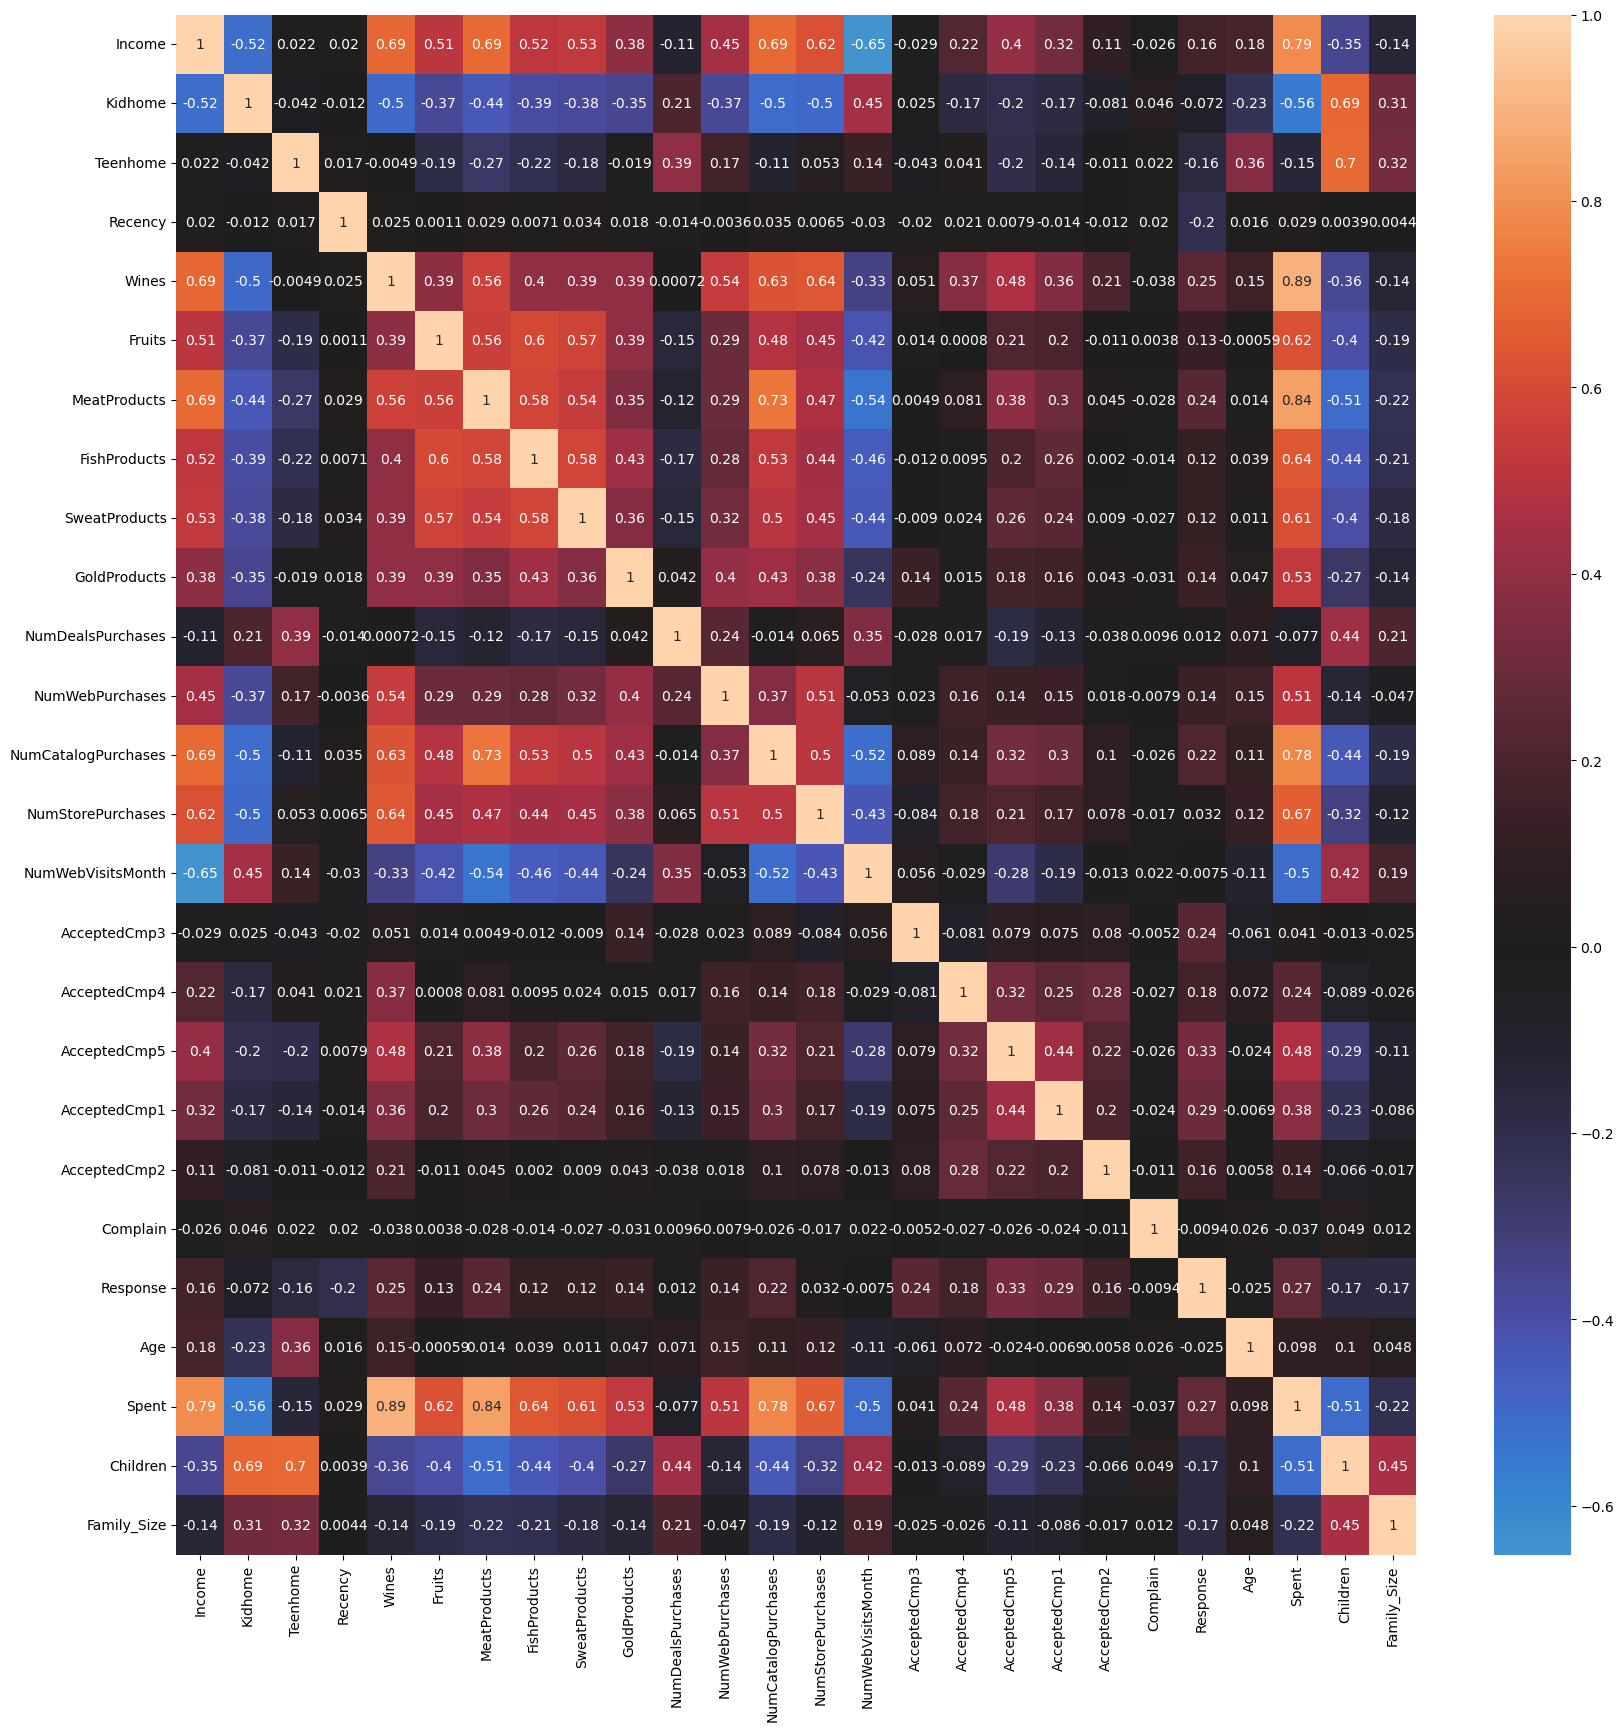

In [50]:
corr= numeric_data.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corr,annot=True, center=0)

In [51]:
data.isna().sum()

Education              0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
Wines                  0
Fruits                 0
MeatProducts           0
FishProducts           0
SweatProducts          0
GoldProducts           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Age                    0
Spent                  0
Living_With            0
Children               0
Family_Size            0
dtype: int64

In [52]:
#DATA PREPROCESSING


s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Recency', 'Living_With']


In [53]:

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [54]:
encoder=LabelEncoder()
for x in object_cols:
    data[x]=data[[x]].apply(encoder.fit_transform)

In [55]:
dc=data.copy()


In [56]:
dc=dc.drop(columns=['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response'],axis=1)

In [57]:
scaler=StandardScaler()
scaler.fit(dc)

scaled_dc=pd.DataFrame(scaler.transform(dc),columns=dc.columns)

In [58]:
pca=PCA(n_components=3)
pca.fit(scaled_dc)
pca_dc=pd.DataFrame(pca.transform(scaled_dc),columns=(['column1','column2','column3']))


In [59]:
pca_dc.describe().T

,count,mean,std,min,25%,50%,75%,max
column1,2014.0,-2.116811e-17,2.755982,-5.801763,-2.499359,-0.736146,2.397913,7.212785
column2,2014.0,2.116811e-17,1.578178,-3.490955,-1.193920,-0.197083,1.134703,6.121351
column3,2014.0,-3.704418e-17,1.288457,-2.534873,-1.070647,-0.359981,1.041302,3.627710


In [60]:
dc

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,MeatProducts,FishProducts,SweatProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Living_With,Children,Family_Size
0,0,58138,0,0,54,635,88,546,172,88,...,3,8,10,4,7,67,1617,0,0,1
1,0,46344,1,1,32,11,1,6,2,1,...,2,1,1,2,5,70,27,0,2,1
2,0,71613,0,0,19,426,49,127,111,21,...,1,8,2,10,4,59,776,1,0,2
3,0,26646,1,0,19,11,4,20,10,3,...,2,2,0,4,6,40,53,1,1,3
4,1,58293,1,0,94,173,43,118,46,27,...,5,5,3,6,5,43,422,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,61223,0,1,41,709,43,182,42,118,...,2,9,3,4,5,57,1341,1,1,3
2236,1,64014,2,1,52,406,0,30,0,0,...,7,8,2,5,7,78,444,1,3,5
2237,0,56981,0,0,91,908,48,217,32,12,...,1,2,3,13,6,43,1241,0,0,1
2238,2,69245,0,1,78,428,30,214,80,30,...,2,6,5,10,3,68,843,1,1,3


In [61]:
X=dc[['Education','Income','Age','Spent','Family_Size']]

In [62]:
km=KMeans(n_clusters=4,random_state=0)

In [63]:
km.fit(dc)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [64]:
label=km.predict(dc)

In [65]:
from sklearn import metrics

score=metrics.silhouette_score(dc,label)
score

0.5259644240705175

In [66]:
n_cluster=5


In [67]:
kmm=KMeans(n_clusters=5)

In [68]:
kmm.fit(X)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [69]:
y_label=kmm.predict(X)

In [70]:
from sklearn import metrics

score=metrics.silhouette_score(X,y_label)
score

0.5353763086871728

In [71]:
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=4,n_init=1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

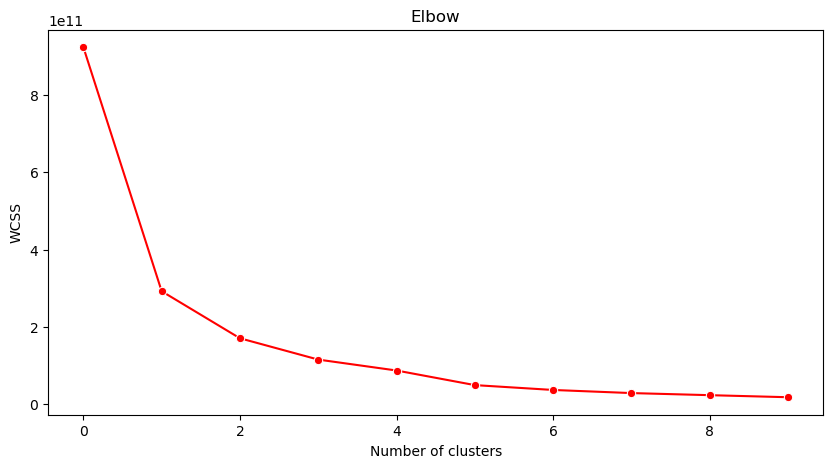

In [72]:

plt.figure(figsize=(10,5))
sns.lineplot( wcss,marker='o',color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


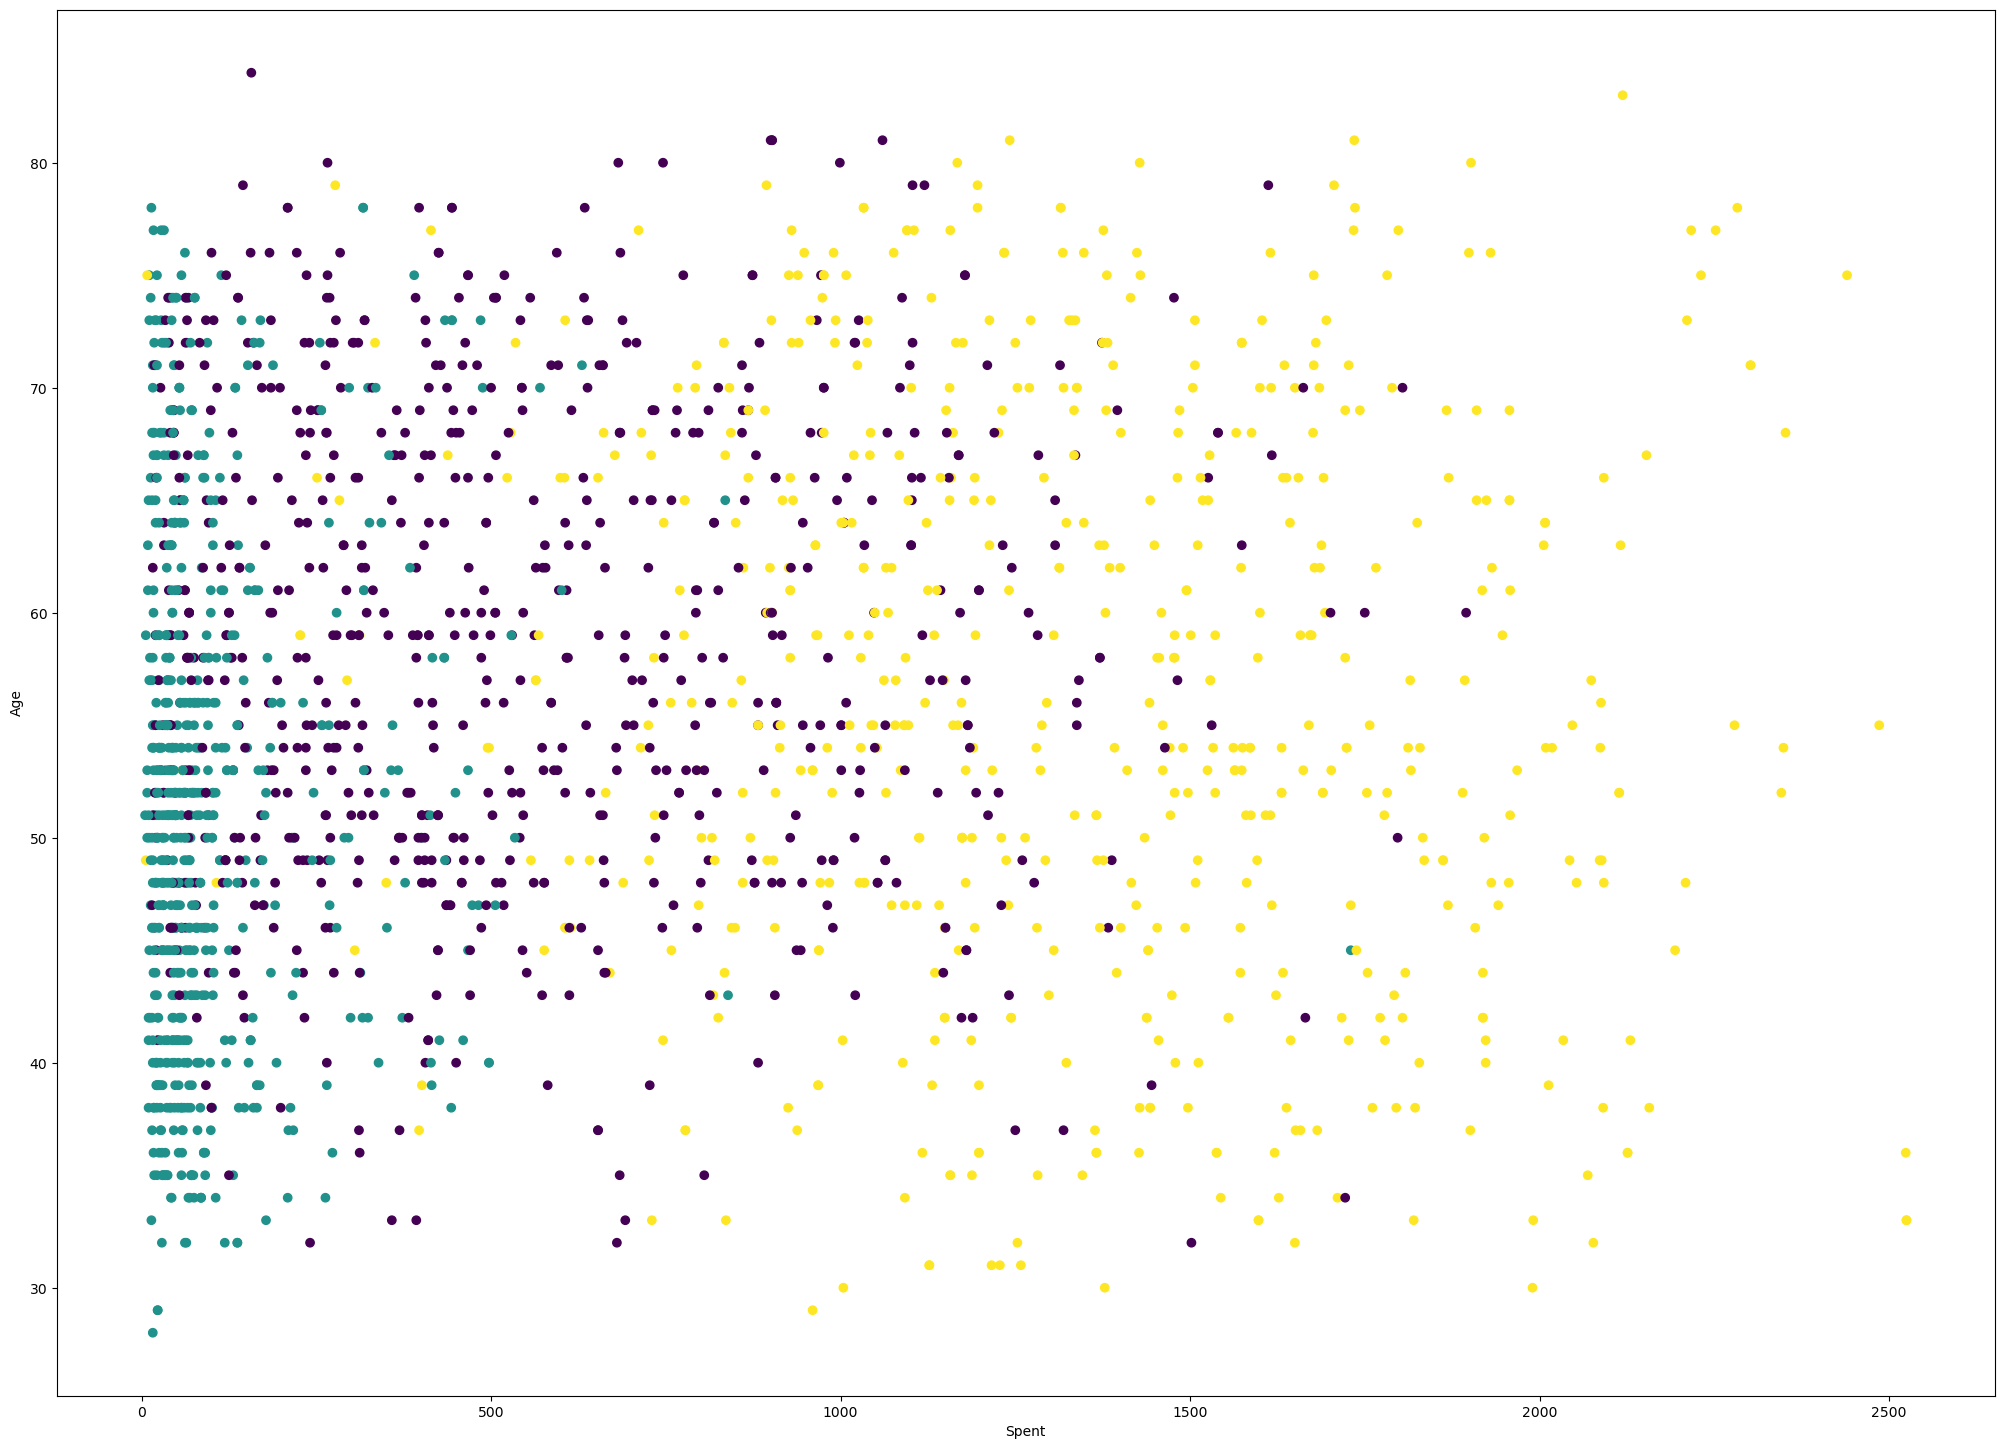

In [73]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
ylabel2 = kmeans.predict(X)
plt.figure(figsize=(25,18))
plt.scatter(X['Spent'],X['Age'],c = ylabel2)
plt.xlabel('Spent')
plt.ylabel('Age')
plt.show()


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


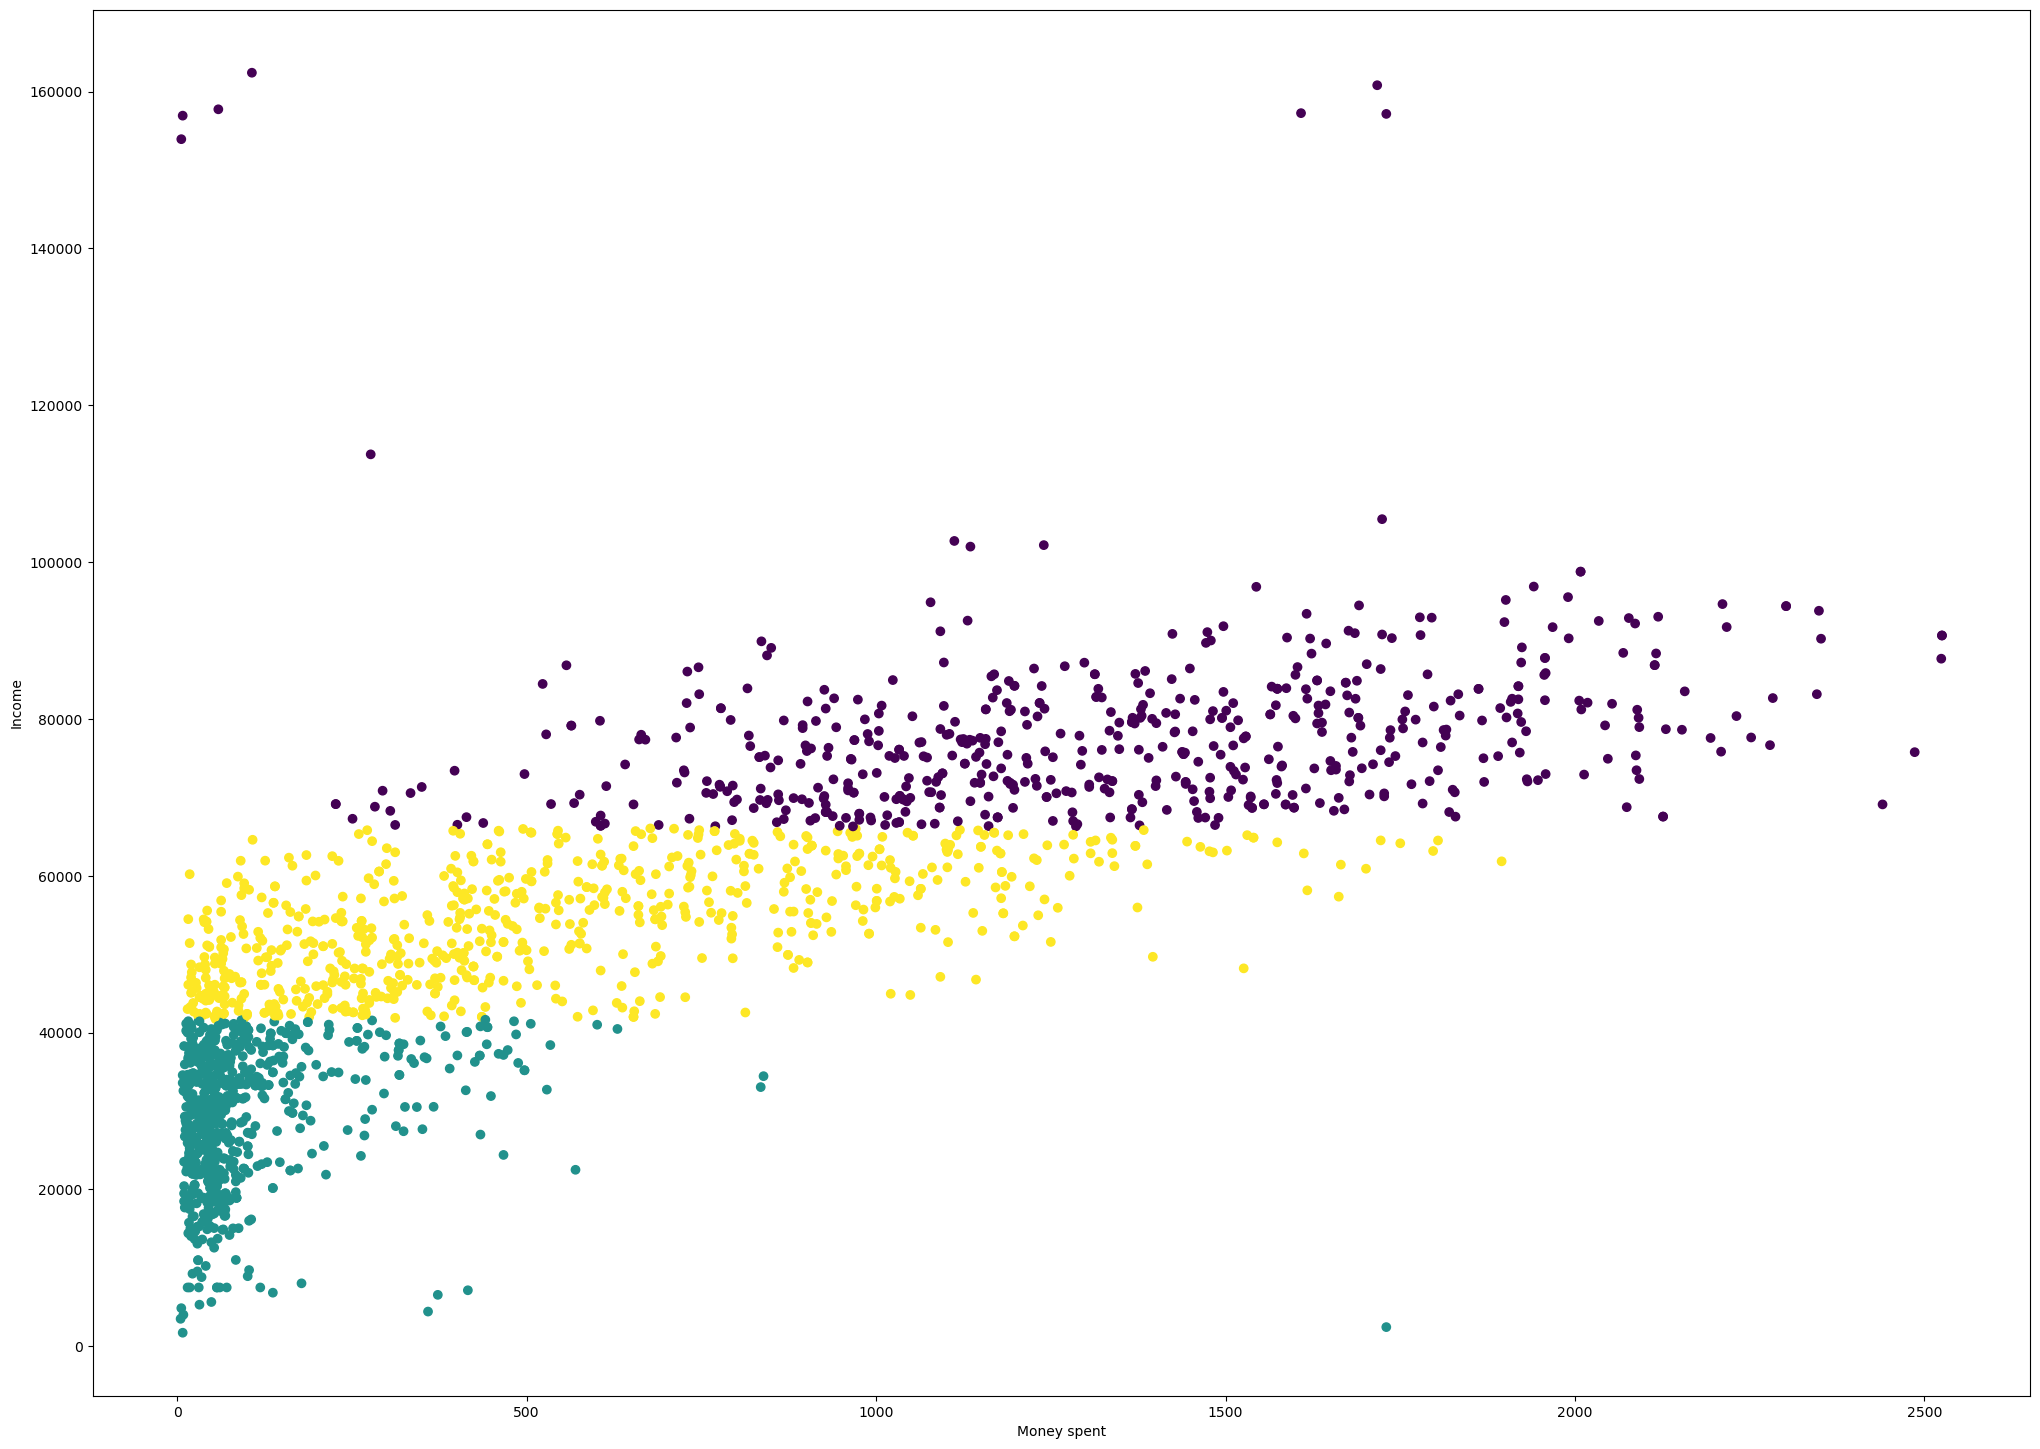

In [74]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
ylabel2 = kmeans.predict(X)
plt.figure(figsize=(25,18))
plt.scatter(X['Spent'],X['Income'],c = ylabel2)
plt.xlabel('Money spent')
plt.ylabel('Income')
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


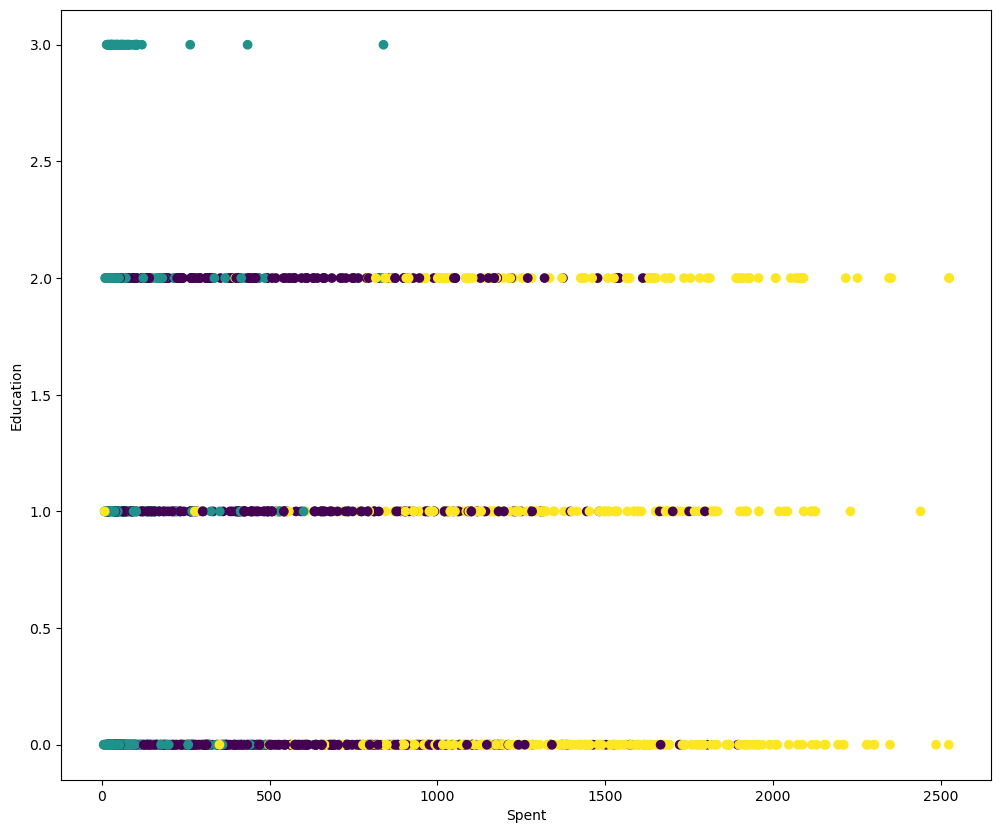

In [75]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
ylabel2 = kmeans.predict(X)
plt.figure(figsize=(12,10))
plt.scatter(X['Spent'],X['Education'],c = ylabel2)
plt.xlabel('Spent')
plt.ylabel('Education')
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


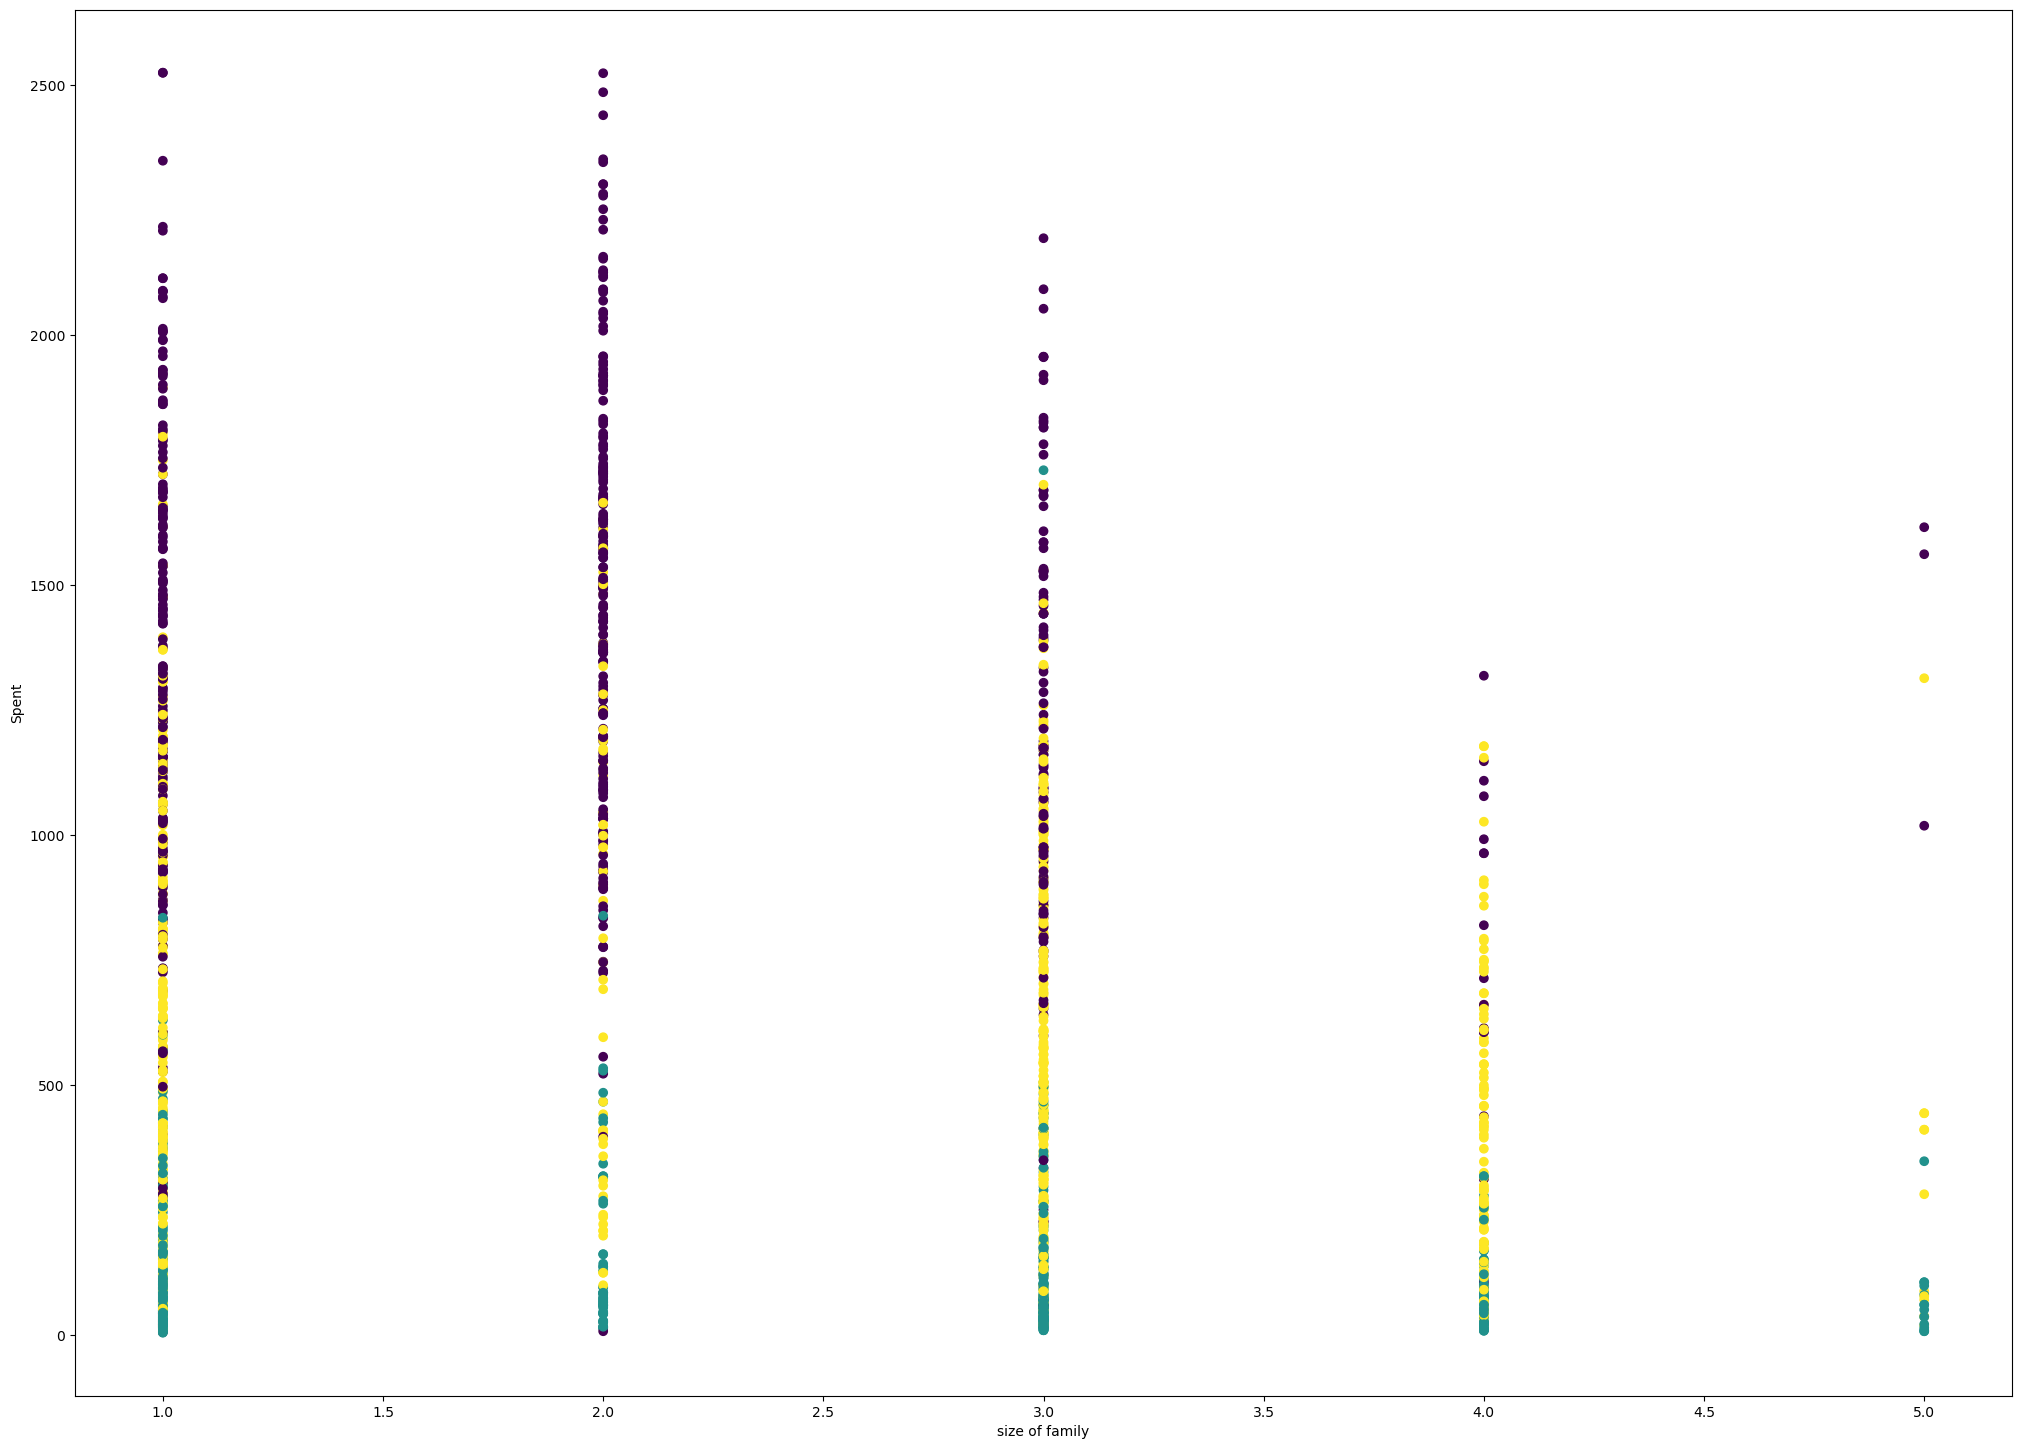

In [76]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
ylabel2 = kmeans.predict(X)
plt.figure(figsize=(25,18))
plt.scatter(X['Family_Size'],X['Spent'],c = ylabel2)
plt.ylabel('Spent')
plt.xlabel('size of family')
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


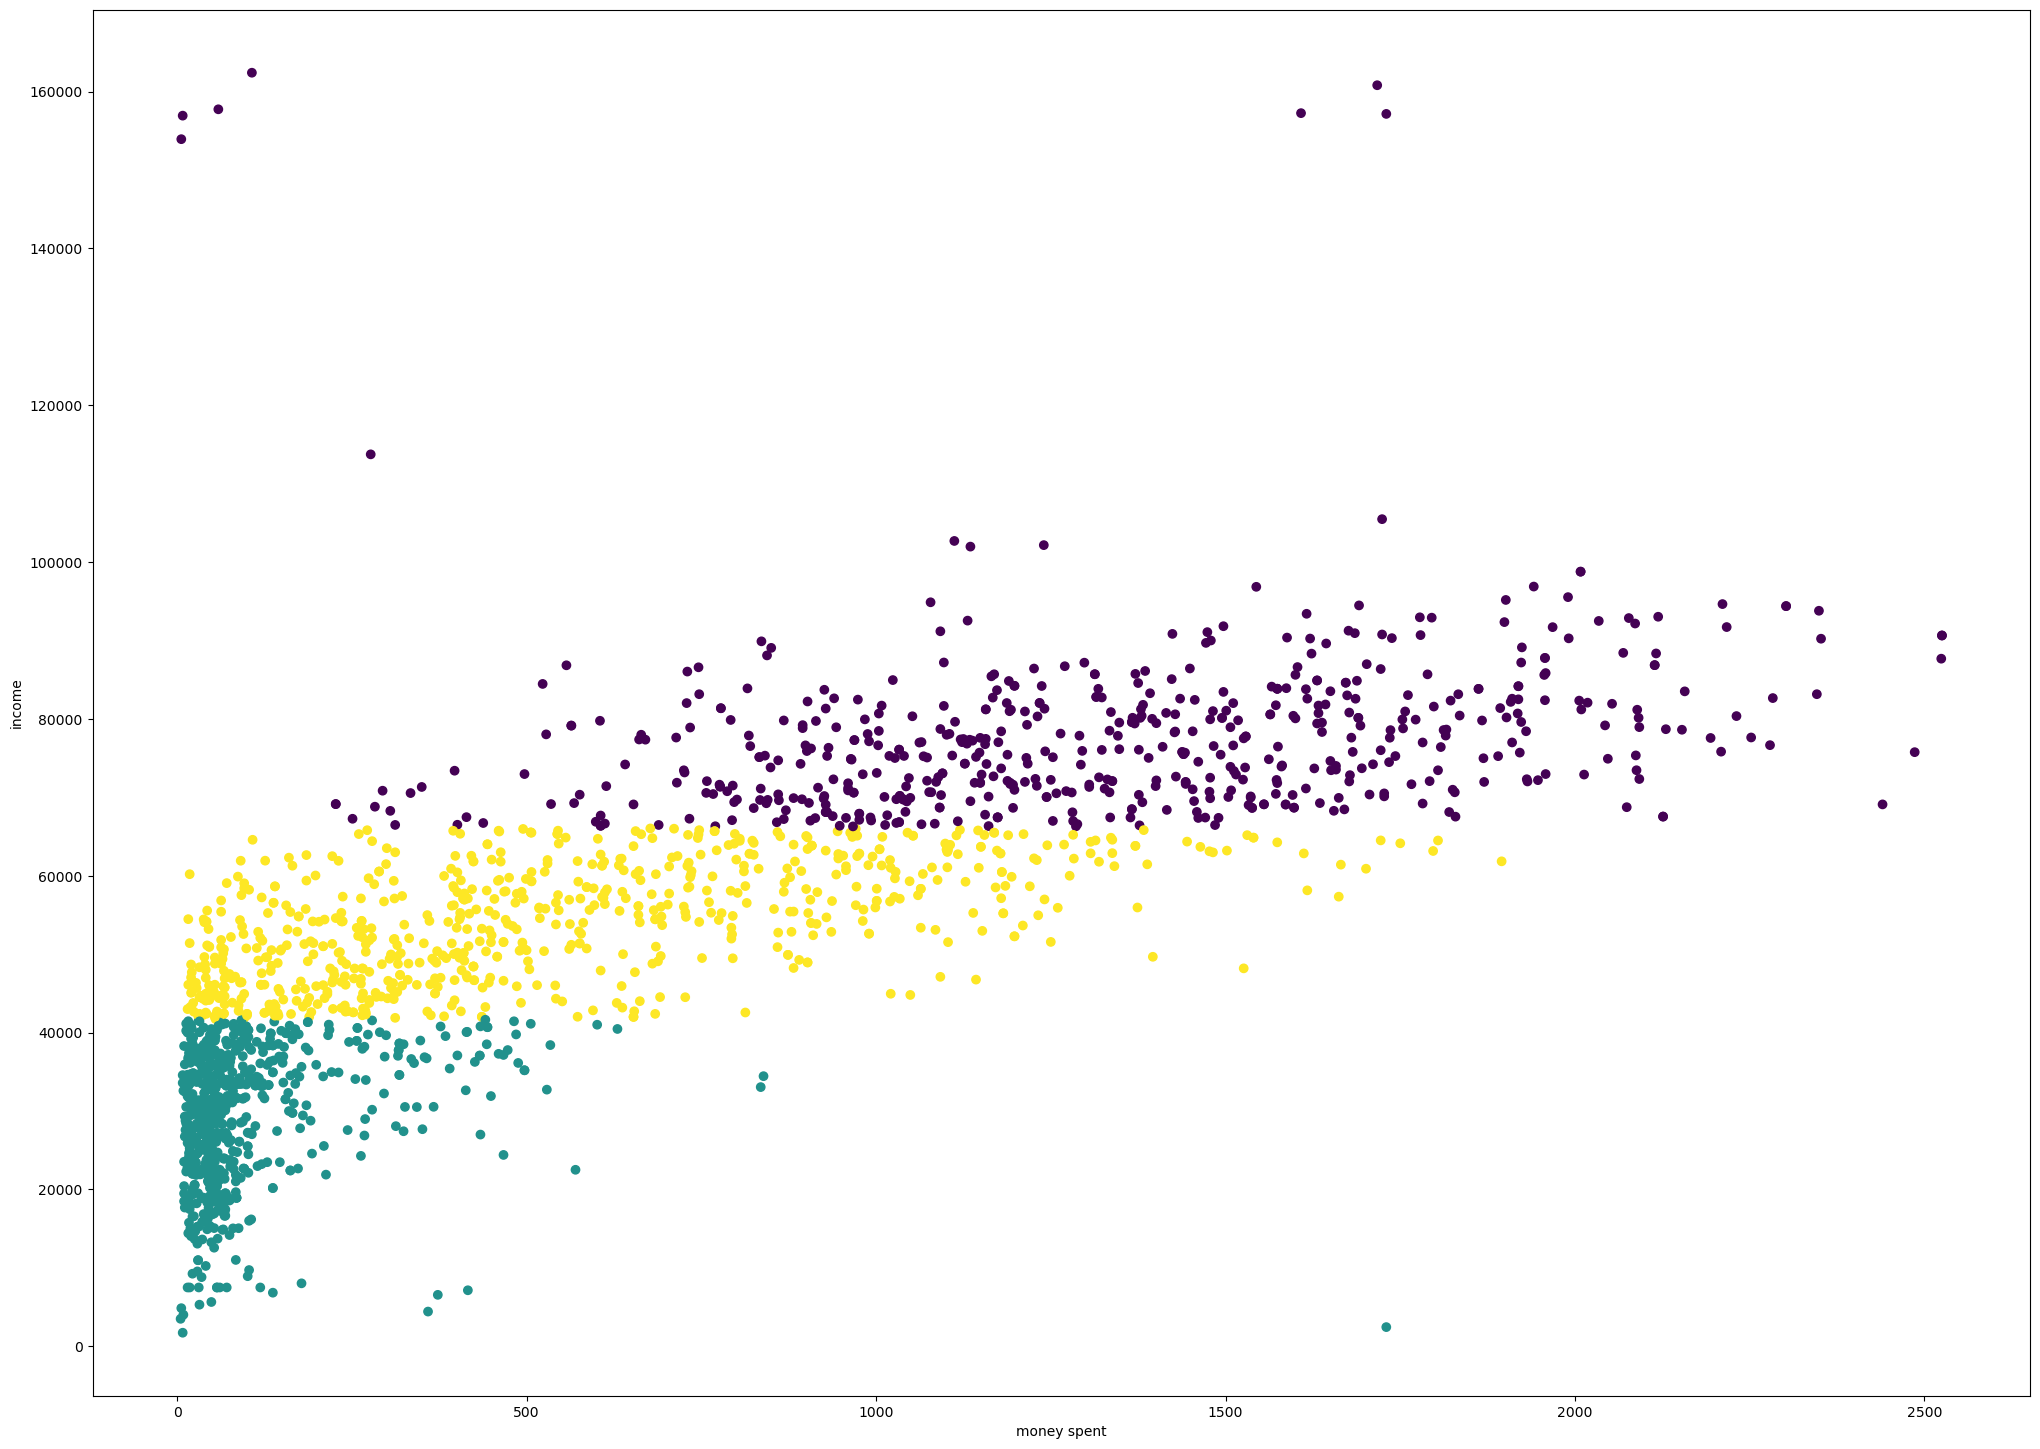

In [77]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
ylabel2 = kmeans.predict(X)
plt.figure(figsize=(25,18))
plt.scatter(X['Spent'],X['Income'],c = ylabel2)
plt.xlabel('money spent')
plt.ylabel('income')
plt.show()